#### Import packages

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

#### Import data


In [2]:
data = pd.read_csv('iris.csv')
data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
X = data.iloc[:, :-1]
y = data.iloc[:, -1]

#### Standardize data


In [4]:
ss = StandardScaler()
X = ss.fit_transform(X)

In [5]:
X = pd.DataFrame(X, columns=data.columns[:-1])
X.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,-1.720542,-0.900681,1.032057,-1.341272,-1.312977
1,-1.697448,-1.143017,-0.124958,-1.341272,-1.312977
2,-1.674353,-1.385353,0.337848,-1.398138,-1.312977
3,-1.651258,-1.506521,0.106445,-1.284407,-1.312977
4,-1.628164,-1.021849,1.263460,-1.341272,-1.312977


In [6]:
print(np.mean(X['SepalLengthCm']), np.std(X['SepalLengthCm']))
print(np.mean(X['SepalWidthCm']), np.std(X['SepalWidthCm']))
print(np.mean(X['PetalLengthCm']), np.std(X['PetalLengthCm']))
print(np.mean(X['PetalWidthCm']), np.std(X['PetalWidthCm']))

#The mean and standard deviation of each attribute
#Mean is close to zero and standard deviation is one

-4.736951571734001e-16 0.9999999999999999
-6.631732200427602e-16 1.0
3.315866100213801e-16 0.9999999999999998
-2.842170943040401e-16 1.0


#### Using PCA for 2D visualization

In [7]:
pca = PCA(n_components=2)
X = pca.fit_transform(X)
X = pd.DataFrame(X, columns=['PC1', 'PC2'])
X.head()

#Pc1 and Pc2 are coordinates in this 2D space

,PC1,PC2
0,-2.816339,0.506051
1,-2.645527,-0.651799
2,-2.879481,-0.321036
3,-2.810934,-0.577363
4,-2.879884,0.670468


#### Visualisation of scatter plot

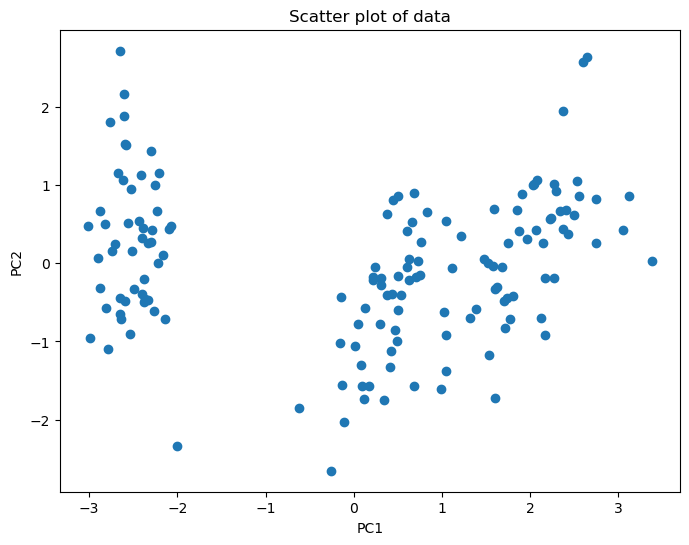

In [8]:
plt.figure(figsize=(8, 6))
plt.scatter(X['PC1'], X['PC2'])
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('Scatter plot of data')
plt.show()

#### Elbow method - Selecting optimal 'K'

In [9]:
sum_of_squared = []

for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, n_init=10, random_state=0)  # Set n_init to 10
    kmeans.fit(X)
    sum_of_squared.append(kmeans.inertia_)  # sum of squared distances

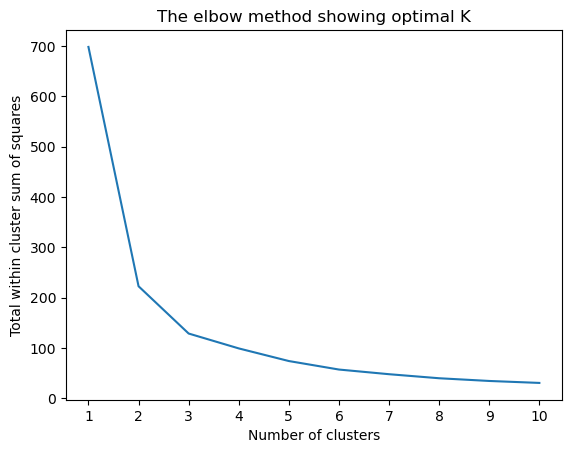

In [10]:
plt.plot(range(1, 11), sum_of_squared)
plt.xticks(range(1,11))
plt.xlabel('Number of clusters')
plt.ylabel('Total within cluster sum of squares')
plt.title('The elbow method showing optimal K')
plt.show()

In [11]:
# Optimal K is 3 as presented by elbow method

#### Training the Model with Optimal K

In [12]:
k_means = KMeans(n_clusters=3,n_init=10)
k_means_model = k_means.fit(X)

#### Evaluate Clusters,  we have the labels

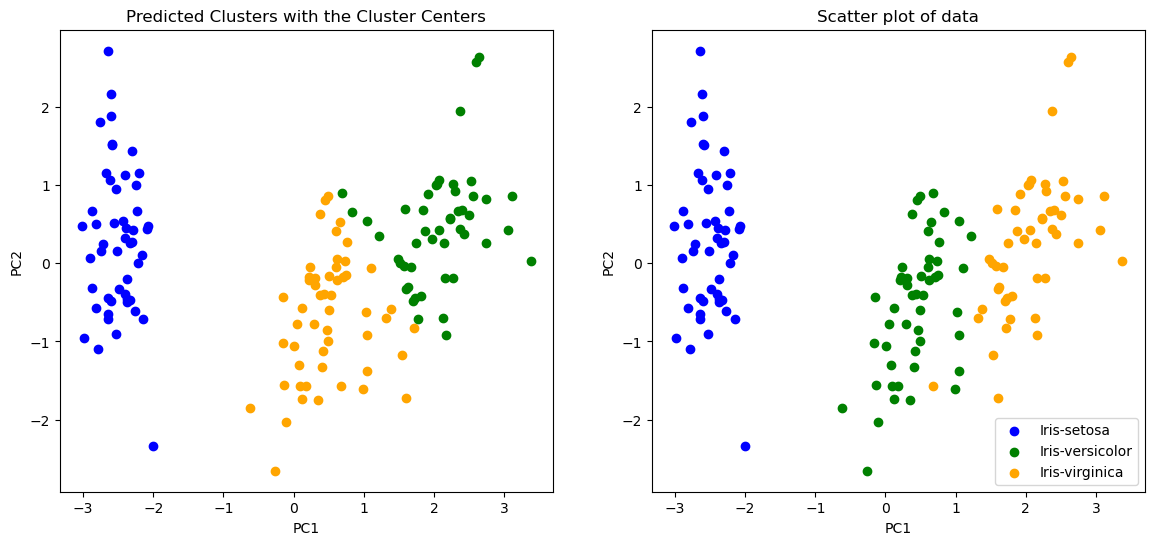

In [15]:
fig = plt.figure(figsize=(14, 6))
# predicted
ax1 = fig.add_subplot(121)
pred = k_means_model.predict(X)
colours = ['orange','green','blue']
for idx in range(3):
    plt.scatter(X[pred == idx]['PC1'], X[pred == idx]['PC2'], c = colours[idx])
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('Predicted Clusters with the Cluster Centers')

# actual
ax2 = fig.add_subplot(122)
plt.scatter(X[y == 'Iris-setosa']['PC1'], X[y == 'Iris-setosa']['PC2'], c='blue', label='Iris-setosa')
plt.scatter(X[y == 'Iris-versicolor']['PC1'], X[y == 'Iris-versicolor']['PC2'], c='green', label='Iris-versicolor')
plt.scatter(X[y == 'Iris-virginica']['PC1'], X[y == 'Iris-virginica']['PC2'], c='orange', label='Iris-virginica')
plt.legend()
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('Scatter plot of data')
plt.show()

#### Compare Clusters

In [16]:
k = 3 # 3 clusters
df_clusters = [X[k_means_model.labels_==i] for i in range(k)]
len(df_clusters)

3

In [17]:
stat_dict = { 
    'Cluster' :   list(range(k)),
    'Size' :      [len(df_clusters[i]) for i in range(k)],
    'Mean PC1' :  [round(df_clusters[i]['PC1'].mean(), 2) for i in range(k)],
    'Std PC1' :   [round(df_clusters[i]['PC1'].std(), 2) for i in range(k)],
    'Mean PC2' :  [round(df_clusters[i]['PC2'].mean(), 2) for i in range(k)],
    'Std pC2' :   [round(df_clusters[i]['PC2'].std(), 2) for i in range(k)]
}
df_cluster_stats = pd.DataFrame(stat_dict)
df_cluster_stats

,Cluster,Size,Mean PC1,Std PC1,Mean PC2,Std pC2
0,0,52,0.50,0.49,-0.69,0.78
1,1,48,2.06,0.55,0.46,0.73
2,2,50,-2.50,0.25,0.28,0.94
